$\newcommand{\bmx}{\large \boldsymbol{x} \normalsize}$
$\newcommand{\bmc}{\large \boldsymbol{c} \normalsize}$
$\newcommand{\bmy}{\large \boldsymbol{y} \normalsize}$
$\newcommand{\bmb}{\large \boldsymbol{b} \normalsize}$


## Implementaciones de la clase anterior

In [ ]:
import numpy as np
from numpy import linalg as LA

def Jacobi(A,b,x0,tol,maxiter):
    n = len(b)
    D = np.diag(A)

    # resto la diagonal de A
    LU = A - np.diag(D)
    x = np.zeros(n)

    # iteraciones
    k=0
    error = 10

    while ( k < maxiter and error > tol ):
        k += 1
        xnew = (b - np.dot(LU,x))/D
        error = LA.norm(xnew-x)
        x = xnew

        print(f"solucion x para la iteracion k={k} con error {error}")
        print("  ", xnew)
        x = xnew

    if k==maxiter:
        print("maximo numero de iteraciones alcanzado")
    else:
        print("solucion encontrada")

    return

## Prueba
A = np.array([[5, -2, 3],[-3,8,1],[-3,-1,-6]])
b = np.array([-1, 4, 0])
nmax=100
tol=0.001
x0=np.array([0,0,0])


# llamamos a Jacobi
Jacobi(A,b,x0,tol,nmax)


solucion x para la iteracion k=1 con error 0.5385164807134505
   [-0.2  0.5 -0. ]
solucion x para la iteracion k=2 con error 0.21424933553637404
   [0.         0.425      0.01666667]
solucion x para la iteracion k=3 con error 0.12071905515608455
   [-0.04        0.49791667 -0.07083333]
solucion x para la iteracion k=4 con error 0.08214333355360849
   [ 0.04166667  0.49385417 -0.06298611]
solucion x para la iteracion k=5 con error 0.05031309993723477
   [ 0.03533333  0.52349826 -0.10314236]
solucion x para la iteracion k=6 con error 0.03609214654275017
   [ 0.07128472  0.5261428  -0.10491638]
solucion x para la iteracion k=7 con error 0.02305332912434438
   [ 0.07340694  0.53984632 -0.12333283]
solucion x para la iteracion k=8 con error 0.01714845005113864
   [ 0.08993822  0.54294421 -0.12667786]
solucion x para la iteracion k=9 con error 0.011465156244891018
   [ 0.0931844   0.54956157 -0.13545981]
solucion x para la iteracion k=10 con error 0.008686504762397658
   [ 0.10110051  0.5518

In [ ]:
# Verificamos la solucion con Python
np.linalg.solve(A,b)

array([ 0.11607143,  0.5625    , -0.15178571])

In [ ]:
# implementamos el radio espectral
def radio_espectralJ(A):
    n = np.shape(A)[0]

    # extraemos la matriz diagonal
    D = np.diag(A)
    # restamos
    LU = A - np.diag(D)
    T = -np.matmul(LA.inv(np.diag(D)), LU)
    autovalores = LA.eigvals(T)
    print("T=")
    print(T)
    print("autovalores", autovalores)
    radio_espectral = np.max(np.abs(autovalores))
    print("radio espectral", radio_espectral)

    return


radio_espectral(A)


T=
[[-0.          0.4        -0.6       ]
 [ 0.375      -0.         -0.125     ]
 [-0.5        -0.16666667 -0.        ]]
autovalores [ 0.74481338 -0.60644324 -0.13837014]
radio espectral 0.7448133799005093


## Ejercicio de no convergencia
La implementacion escalar esta en las notas de clase y no la haremos en esta clase.

In [ ]:
A = np.array([[5, -2, 3],[-3,8,1],[-3,-1,-6]])
A

array([[ 5, -2,  3],
       [-3,  8,  1],
       [-3, -1, -6]])

In [ ]:
np.tril(A)

array([[ 5,  0,  0],
       [-3,  8,  0],
       [-3, -1, -6]])

### Ejemplo con no convergencia



In [ ]:
A = np.array( [[1,3], [3, 1]])
b = np.array( [-1,4])

nmax=10
tol=0.1
x0 = np.zeros(len(b))

Jacobi(A,b,x0,tol,nmax)

solucion x para la iteracion k=1 con error 4.123105625617661
   [-1.  4.]
solucion x para la iteracion k=2 con error 12.36931687685298
   [-13.   7.]
solucion x para la iteracion k=3 con error 37.107950630558946
   [-22.  43.]
solucion x para la iteracion k=4 con error 111.32385189167684
   [-130.   70.]
solucion x para la iteracion k=5 con error 333.9715556750305
   [-211.  394.]
solucion x para la iteracion k=6 con error 1001.9146670250915
   [-1183.   637.]
solucion x para la iteracion k=7 con error 3005.7440010752744
   [-1912.  3553.]
solucion x para la iteracion k=8 con error 9017.232003225823
   [-10660.   5740.]
solucion x para la iteracion k=9 con error 27051.69600967747
   [-17221.  31984.]
solucion x para la iteracion k=10 con error 81155.08802903241
   [-95953.  51667.]
maximo numero de iteraciones alcanzado


In [ ]:
# radio espectral
radio_espectralJ(A)

T=
[[-0. -3.]
 [-3. -0.]]
autovalores [ 3. -3.]
radio espectral 3.000000000000001


## Matrix que converge en Jacobi pero no en Gauss-Seidel

In [ ]:
A = np.array( [[1,0,1], [-1,1,0], [1,2,-3]])
radio_espectralJ(A) # Jacobi converge

T=
[[-0.         -0.         -1.        ]
 [ 1.         -0.         -0.        ]
 [ 0.33333333  0.66666667 -0.        ]]
autovalores [ 0.37370763+0.86735546j  0.37370763-0.86735546j -0.74741525+0.j        ]
radio espectral 0.9444378697709912


## Matrix que diverge en Jacobi pero converge en Gauss-Seidel


In [ ]:
A = np.array([[1,0.5,0.5],[0.5, 1, 0.5], [0.5,0.5,1]])
A

array([[1. , 0.5, 0.5],
       [0.5, 1. , 0.5],
       [0.5, 0.5, 1. ]])

In [ ]:
radio_espectralJ(A) # Jacobi

T=
[[-0.  -0.5 -0.5]
 [-0.5 -0.  -0.5]
 [-0.5 -0.5 -0. ]]
autovalores [ 0.5 -1.   0.5]
radio espectral 0.9999999999999998


## Metodo de Gauss-Seidel.

$$ A = L + D + U.$$


$$(L+D) \bmx  + U \bmx = \bmb .$$
$$\bmx_{k+1} = (L + D)^{-1} ( - U \bmx_k + \bmb).$$

Vamos a ver que este metodo ofrece mejor memoria por que podemos recilar el vector $\bmx_k$ sobre el cual estamos trabajando.

Llevandolo a la forma **canonica**

$$ \bmx_{k+1} = T_{GS} \bmx_k + \bmc.$$


Donde

$$T_{GS} = -(L+D)^{-1} U  \quad  , \quad \bmc=(L+D)^{-1} \bmb.$$

### Forma "granulada". (componentes)

$$a_{ii} x_i^{(k+1)} + \sum_{j=1}^{i-1} a_{ij} x_j^{(k+1)}=-\sum_{i+1}^n a_{ij} x_j^{(k)} + b_i .$$

De la ecuacion anterior

$$ x_i^{(k+1)} = \frac{1}{a_{ii}} \left ( b_i - \sum_{j=1}^{i-1} a_{ij} x_j^{(k+1)} - \sum_{i+1}^{n} a_{ij} x_j^{(k)} \right ) .$$

Ejemplo.

Resuelva el siguiente sistema

\begin{eqnarray}
A = \begin{pmatrix} 5 & - 2 & 3 \\ -3 & 8 & 1 \\ -3 & -1 & -6 \end{pmatrix}
\begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix}
=
\begin{pmatrix} -1 \\ 4 \\ 0 \end{pmatrix}
\end{eqnarray}
Usando el algoritmo de Gauss-Seidel, con un error maximo de $0.5$
entre dos iteraciones consecutivas.


* Comenzamos con $\bmx_0=0$.
$$5 x_1 - 2x_2 + 3 x_3 = -1 .$$
De aca $x_1 =-0.2 $
* $$ -3 x_1 + 8 x_2 + x_3 = 4.$$
Reemplazamos $x_1=-0.2$,    $x_3=0$.

$$x_2 = [4  + 3(-0.2) - 0]/8 = 0.425 .$$

* La tercera ecuacion es:
$$ -3 x_1 - x_2 - 6 x_3 = 0 .$$
Reemplazamos $x_1=-0.2$, $x_2=0.425$


$$x_3 =  \frac16 [ -3(-0.2) -0.425]  \approx 0.028161616...$$


El error $$\| \bmx_1 - \bmx_0 \| .$$


In [ ]:
x0 = np.zeros(len(b)+1)
x1 = np.array([-0.2, 0.425, 0.028161616])
LA.norm(x1-x0)

0.4705508225640791

## Implementacion del Algoritmo Gauss-Seidel en `Python`

In [ ]:
import numpy as np
from numpy import linalg as LA

def GaussSeidel(A,b,x0,tol,maxiter):
    # matriz L (L+D)
    L = np.tril(A) # L + D
    U = A - L
    n = len(b)
    k=0
    error = 10
    # x = np.zeros(n)

    # TGS
    # INversa de L+D
    LAI = LA.inv(L)

    while ( k < maxiter and error > tol ):
        k += 1
        x = x0
        xnew = np.dot(LAI, b -np.dot(U,x))
        error = LA.norm(xnew-x0)
        x0 = xnew

        print(f"solucion x para la iteracion k={k} con error {error}")
        print("  ", xnew)

    if k == maxiter:
        print("maximo numero de iteraciones alcanzado")
        print("probablemente no hay convergencia")
        return
    else:
        print("solucion encontrada")
        return x




    return

## Prueba







In [ ]:
# prueba
A = np.array([[5, -2, 3],[-3,8,1],[-3,-1,-6]])
b = np.array([-1, 4, 0])
nmax=100
tol=0.001
x0=np.zeros(len(b))


# llamamos a Jacobi
GaussSeidel(A,b,x0,tol,nmax)

solucion x para la iteracion k=1 con error 0.4706120423920795
   [-0.2         0.425       0.02916667]
solucion x para la iteracion k=2 con error 0.18269511241177536
   [-0.0475      0.47854167 -0.05600694]
solucion x para la iteracion k=3 con error 0.09221320101413331
   [ 0.02502083  0.51638368 -0.09857436]
solucion x para la iteracion k=4 con error 0.05140888029866591
   [ 0.06569809  0.53695858 -0.12234214]
solucion x para la iteracion k=5 con error 0.028438043330044446
   [ 0.08818872  0.54836354 -0.13548828]
solucion x para la iteracion k=6 con error 0.015741226875646098
   [ 0.10063838  0.55467543 -0.1427651 ]
solucion x para la iteracion k=7 con error 0.008712741409892973
   [ 0.10752923  0.5581691  -0.1467928 ]
solucion x para la iteracion k=8 con error 0.00482250755524673
   [ 0.11134332  0.56010284 -0.14902213]
solucion x para la iteracion k=9 con error 0.0026692598758310507
   [ 0.11345442  0.56117317 -0.15025607]
solucion x para la iteracion k=10 con error 0.00147743645909

array([ 0.11462291,  0.5617656 , -0.15093906])

In [ ]:
# verificacion con linalg
np.linalg.solve(A,b)

array([ 0.11607143,  0.5625    , -0.15178571])

## Ejemplo de no convergencia

In [ ]:
A = np.array([[1,3], [3, 1]])
b = np.array([-1,4])
nmax=100
tol=0.1
nmax=10
x0 = np.zeros(len(b))
x = GaussSeidel(A,b,x0,tol,nmax)

solucion x para la iteracion k=1 con error 7.0710678118654755
   [-1.  7.]
solucion x para la iteracion k=2 con error 66.40783086353596
   [-22.  70.]
solucion x para la iteracion k=3 con error 597.6704777718237
   [-211.  637.]
solucion x para la iteracion k=4 con error 5379.034299946413
   [-1912.  5740.]
solucion x para la iteracion k=5 con error 48411.30869951772
   [-17221.  51667.]
solucion x para la iteracion k=6 con error 435701.77829565946
   [-155002.  465010.]
solucion x para la iteracion k=7 con error 3921316.004660935
   [-1395031.  4185097.]
solucion x para la iteracion k=8 con error 35291844.041948415
   [-12555292.  37665880.]
solucion x para la iteracion k=9 con error 317626596.37753576
   [-1.12997641e+08  3.38992927e+08]
solucion x para la iteracion k=10 con error 2858639367.397822
   [-1.01697878e+09  3.05093635e+09]
maximo numero de iteraciones alcanzado
probablemente no hay convergencia


In [ ]:
# a pesar de que A tiene inversa Gauss-Seidel no converge

LA.inv(A)


array([[-0.125,  0.375],
       [ 0.375, -0.125]])

## Matriz que converge para Jacobi pero no para Gauss-Seidel

In [ ]:
A = np.array([[1,0,1], [-1,1,0], [1,2,-3]])
radio_espectral(A)

T=
[[-0.         -0.         -1.        ]
 [ 1.         -0.         -0.        ]
 [ 0.33333333  0.66666667 -0.        ]]
autovalores [ 0.37370763+0.86735546j  0.37370763-0.86735546j -0.74741525+0.j        ]
radio espectral 0.9444378697709912


In [ ]:
# programamos radio espectral para Gauss-Seidel
def radio_espectralGS(A):  # pero el radio espectral es para T_GS
    n = np.shape(A)[0]
    # extraemos la matriz diagonal
    L = np.tril(A)
    # restamos
    U = A - L

    T = -np.matmul(LA.inv(L), U)
    autovalores = LA.eigvals(T)
    print("T=")
    print(T)
    print("autovalores", autovalores)
    radio_espectral = np.max(np.abs(autovalores))
    print("radio espectral", radio_espectral)

    return radio_espectral


In [ ]:
A

array([[ 1,  0,  1],
       [-1,  1,  0],
       [ 1,  2, -3]])

In [ ]:
radio_espectralGS(A)

T=
[[-0. -0. -1.]
 [-0. -0. -1.]
 [-0. -0. -1.]]
autovalores [-0. -0. -1.]
radio espectral 1.0


1.0

## Algoritmo "granulado" para Gauss-Seidel
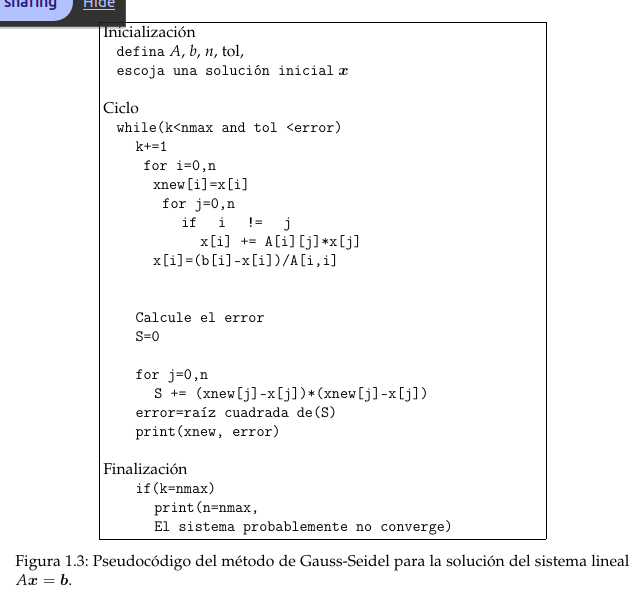

## Implemantacion escalar de Gauss-Seidel

In [ ]:
import numpy as np
def gauss_seidel2(A,b,tol,max_iter):

    n = len(b) #tamaño del sistema de ecuacio
    x=np.zeros(n)
    xnew=np.zeros(n)
    error=10
    k=0

    while (k < max_iter and error > tol):

        for i in range(n):
            S=0
            # solve x en xnew
            xnew[i] = x[i]
            for j in range(n):
                if i != j:
                    S = S + A[i,j]*xnew[j]
            x[i] = (b[i]-S)/A[i,i]

        k +=1

        # calculamos el error
        S=0
        for j in range(n):
            S += (xnew[j]-x[j])**2
        error = np.sqrt(S)

        print(f"solucion x={xnew} en la iteracion {k}")
        print(f"error={error}")
    return xnew



In [ ]:
A = np.array([[5, -2, 3],[-3,8,1], [-3,-1,-6]])
A

array([[ 5, -2,  3],
       [-3,  8,  1],
       [-3, -1, -6]])

In [ ]:
b = np.array([-1,4,0])

nmax=100
tol=0.0001
x0 = np.array([0,0,0])
gauss_seidel2(A,b,tol,nmax)

solucion x=[0. 0. 0.] en la iteracion 1
error=0.5385164807134505
solucion x=[-0.2  0.5 -0. ] en la iteracion 2
error=0.07682953714410741
solucion x=[-0.2         0.425       0.01666667] en la iteracion 3
error=0.20039024427351748
solucion x=[0.         0.425      0.02916667] en la iteracion 4
error=0.130064754171827
solucion x=[-0.04        0.49791667 -0.07083333] en la iteracion 5
error=0.019802658984463158
solucion x=[-0.0475      0.48135417 -0.06298611] en la iteracion 6
error=0.08992734637399268
solucion x=[ 0.04166667  0.49104167 -0.05647569] en la iteracion 7
error=0.05758578515597651
solucion x=[ 0.03033333  0.52349826 -0.10267361] en la iteracion 8
error=0.005070427726299641
solucion x=[ 0.03030208  0.51843446 -0.10241638] en la iteracion 9
error=0.041116351553127164
solucion x=[ 0.07100347  0.52419748 -0.10155679] en la iteracion 10
error=0.026284943385178082
solucion x=[ 0.06882361  0.53942835 -0.12286798] en la iteracion 11
error=0.0024811017357835507
solucion x=[ 0.07061306

array([ 0.11565704,  0.56225905, -0.15148811])

In [ ]:
LA.solve(A,b)

array([ 0.11607143,  0.5625    , -0.15178571])

## **Teorema**:
Si $A$ es estrictamente diagonal dominante por filas (o por columnas) entonces las itearaciones de Gauss-Seidel convergen.

**Prueba**:
Sabemos que las iteraciones son de la forma

$$\bmx_{k+1} = T_{GS} \bmx_k + \bmc .$$

Con $T_{GS}= -(L+D)^{-1} U$, con $L$ triangular inferior, $D$ diagonal y $U$ triangular superior.

Escribamos


\begin{eqnarray}
    T &=& -(L+D)^{-1} U \\
    (L+D)T &=& -U \\
    DT &=& -U - LT \\
    T &=& -D^{-1}( U + LT)
\end{eqnarray}

Probamos que $\| T \|_{\infty} < 1 $ y por lo tanto
$\rho(T)< 1$.

Usamos induccion matematica

* Se prueba para $i=1$ (arranque)
* Si para $i$ se cumple implica que se cumpla para $i+1$ entonces
por efecto "domino" se cumple para todos.

* Asuamos $i=1$ (fila 1)
La matriz $L$ en la fila uno tiene solo ceros. Entonces

$(LT)_1 = 0 $


Veamos la primera componente de $T \bmx$


$$ | (T \bmx)_1 | = \left | \frac{1}{a_{11}} \sum_{j=2}^n a_{1j} x_j  \right | \le \frac{1}{|a_{11}|} \sum_{j=2}^n | a_{1j} |x_j| \le \frac{1}{a_{11}} \sum_{j=2}^n | a_{1j}  \| \bmx \|_{\infty} \
\le \| \bmx \|_{\infty} \frac{1}{|a_{11}|}\sum_{j=2}^n | a_{1j}| < \| \bmx \|_{\infty} $$



    






Esto quiere decir que $ | (T \bmx)_1 | < \| \bmx \|_{\infty}$

* Asumamos que para la fila $i$

$$| (T \bmx)_{i}| \le \| \bmx \|_{\infty}  .$$

Veamos

\begin{eqnarray}
| (T \bmx)_{i+1} | &=& \frac{1}{| a_{i+1 i+1} |} \left |
\sum_{j=i+2}^n a_{ij} x_j + \sum_{j=1}^i a_{ij} (T \bmx)_j\right | \\
&\le& \frac{1}{| a_{i+1 i+1} |} \left (
    \sum_{j=i+1}^n | a_{ij} | | x_j | + \sum_{j=1}^i | a_{ij}| |(T \bmx)_j |
    \right ) \\
&\le& \frac{1}{| a_{i+1 i+1} |} \left (
    \sum_{j=i+1}^n | a_{ij} | | x_j | + \sum_{j=1}^i | a_{ij}| \| \bmx \|_{\infty}
    \right ) \\
&\le& \frac{1}{| a_{i+1 i+1} |} \left (
    \sum_{j=i+1}^n | a_{ij} | \| \bmx \|_{\infty} + \sum_{j=1}^i | a_{ij}| \| \bmx \|_{\infty}
    \right ) \\
    &\le& \frac{1}{| a_{i+1 i+1} |} \sum_{j=1, j \ne i+1}^{n} | a_{ij} |  \| x \|_{\infty}
    \\
    &<& \| x \|_{\infty}
\end{eqnarray}


Pero

$$ \| T  \|_{\infty} = \sup \left  \{ \frac{ \| T \bmx \|}{\| \bmx \|_{\infty} } , \bmx \ne 0   \right \} = \sup_{ \| \bmx \|_{\infty} = 1} \{ \| T \bmx \|  \} .$$

Divididiendo tenemos que $\| T \|_{\infty} < 1$ y por lo tanto
$\rho(T) < 1$ y el sistema converge.